In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
import seaborn as sns


In [109]:
start = datetime(2019,1,1)
end = datetime(2021,1,1)
ticker = ['AAPL','AMZN','TSLA','MSFT','NFLX']
stocks = web.DataReader(ticker,'yahoo',start,end)
stocks_price = stocks['Adj Close']

stocks_price.head(5)

Symbols,AAPL,AMZN,TSLA,MSFT,NFLX
Date,,,,,
2018-12-31,38.395920,1501.969971,66.559998,98.585632,267.660004
2019-01-02,38.439735,1539.130005,62.023998,98.148849,267.660004
2019-01-03,34.610851,1500.280029,60.071999,94.538162,271.200012
2019-01-04,36.088364,1575.390015,63.537998,98.935059,297.570007
2019-01-07,36.008041,1629.510010,66.991997,99.061226,315.339996


What is the Min Close price for each bank's stock throughout the time period?

In [110]:
stocks['Adj Close'].min()


Symbols
AAPL      34.610851
AMZN    1500.280029
TSLA      35.793999
MSFT      94.538162
NFLX     254.589996
dtype: float64

What is the max Close price for each bank's stock throughout the time period?

In [111]:
stocks_price.max()

Symbols
AAPL     136.254608
AMZN    3531.449951
TSLA     705.669983
MSFT     229.983139
NFLX     556.549988
dtype: float64

# Financial Statistics

Text(0.5, 0, 'Date')

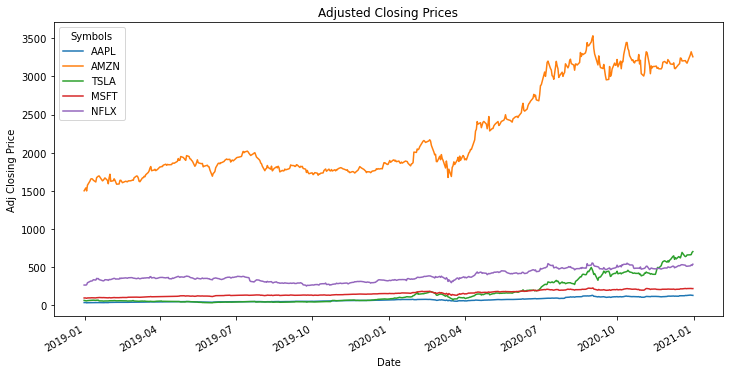

In [112]:
stocks_price.plot(figsize = (12,6))
plt.title("Adjusted Closing Prices")
plt.ylabel("Adj Closing Price")
plt.xlabel("Date")

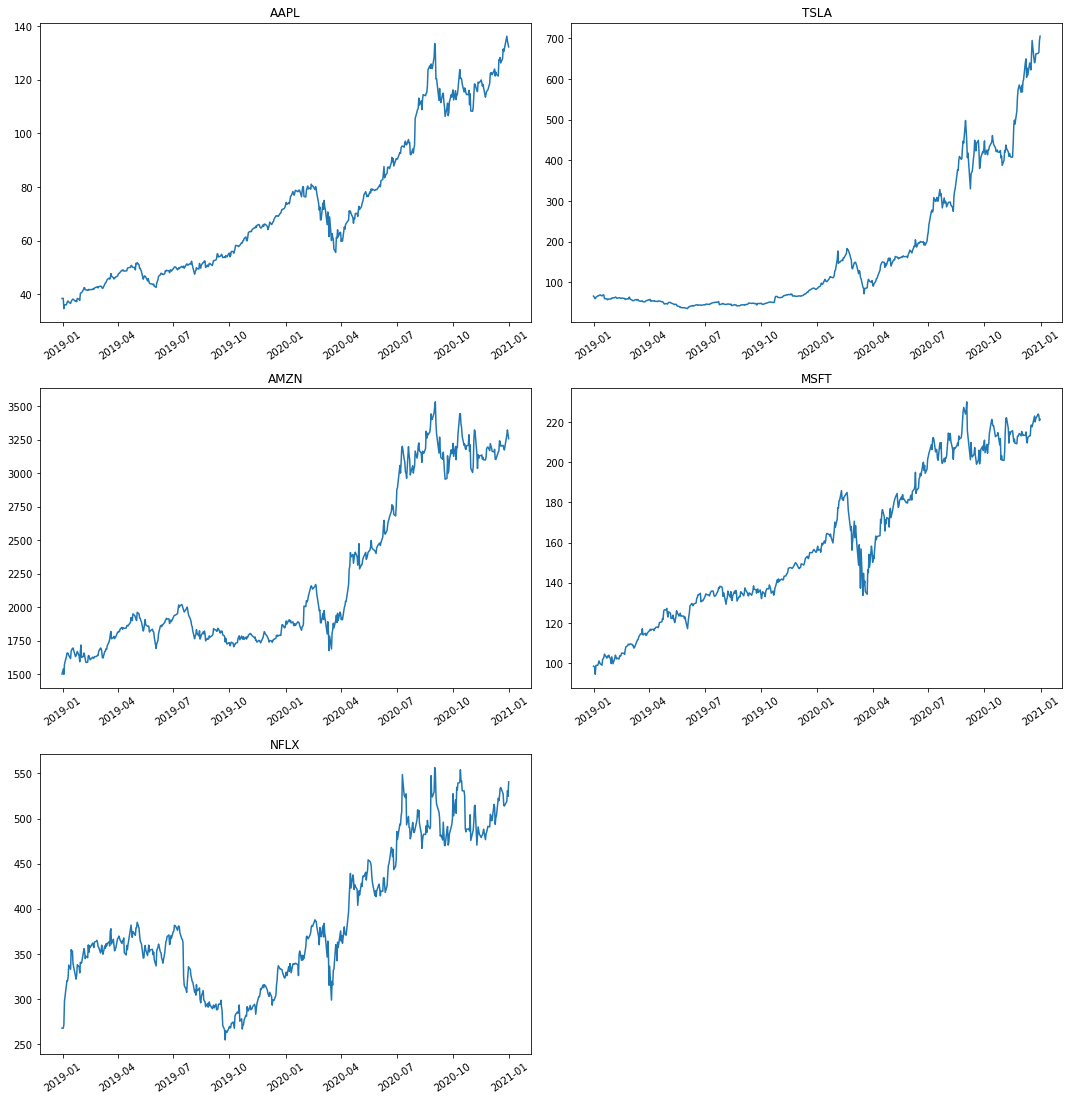

In [113]:
#Visualising each plot for better analysis
f = plt.figure(figsize=(32,10))
f.set_figheight(25)
f.set_figwidth(15)

ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)



ax1.plot(stocks_price['AAPL'])
ax1.tick_params(axis='x', rotation=35)
ax1.set_title('AAPL')


ax2.plot(stocks_price['TSLA'])
ax2.tick_params(axis='x', rotation=35)
ax2.set_title('TSLA')

ax3.plot(stocks_price['AMZN'])
ax3.tick_params(axis='x', rotation=35)
ax3.set_title('AMZN')

ax4.plot(stocks_price['MSFT'])
ax4.tick_params(axis='x', rotation=35)
ax4.set_title('MSFT')

ax5.plot(stocks_price['NFLX'])
ax5.tick_params(axis='x', rotation=35)
ax5.set_title('NFLX')
plt.tight_layout()

# Returns

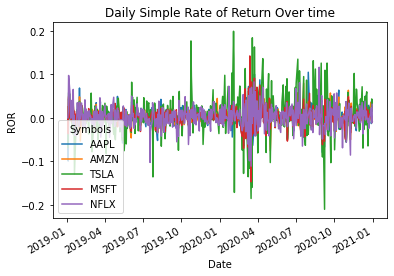

<Figure size 1152x648 with 0 Axes>

In [114]:
stock_data_daily_returns = stocks_price.pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

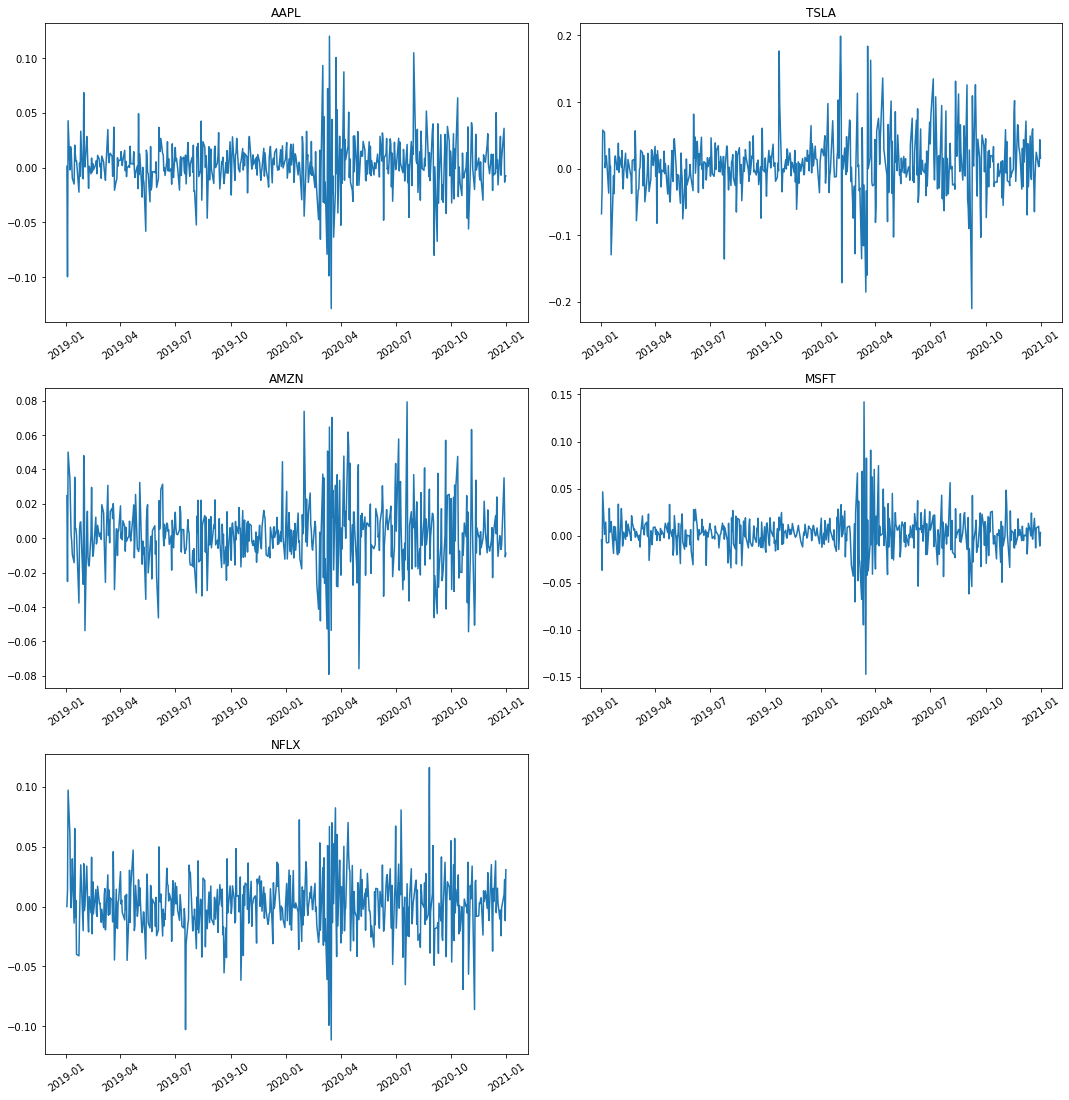

In [115]:
#visualising each stock returns for better analysis
f = plt.figure(figsize=(32,10))
f.set_figheight(25)
f.set_figwidth(15)

ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)



ax1.plot(stock_data_daily_returns['AAPL'])
ax1.tick_params(axis='x', rotation=35)
ax1.set_title('AAPL')


ax2.plot(stock_data_daily_returns['TSLA'])
ax2.tick_params(axis='x', rotation=35)
ax2.set_title('TSLA')

ax3.plot(stock_data_daily_returns['AMZN'])
ax3.tick_params(axis='x', rotation=35)
ax3.set_title('AMZN')

ax4.plot(stock_data_daily_returns['MSFT'])
ax4.tick_params(axis='x', rotation=35)
ax4.set_title('MSFT')

ax5.plot(stock_data_daily_returns['NFLX'])
ax5.tick_params(axis='x', rotation=35)
ax5.set_title('NFLX')
plt.tight_layout()
plt.show()

###  Calculate and plot the mean of each tech stock's daily simple rate of return

In [133]:
daily_mean = stock_data_daily_returns.mean()

print(daily_mean)

Symbols
AAPL    0.002736
AMZN    0.001732
TSLA    0.005727
MSFT    0.001833
NFLX    0.001723
dtype: float64


In [117]:
daily_mean.keys()

Index(['AAPL', 'AMZN', 'TSLA', 'MSFT', 'NFLX'], dtype='object', name='Symbols')

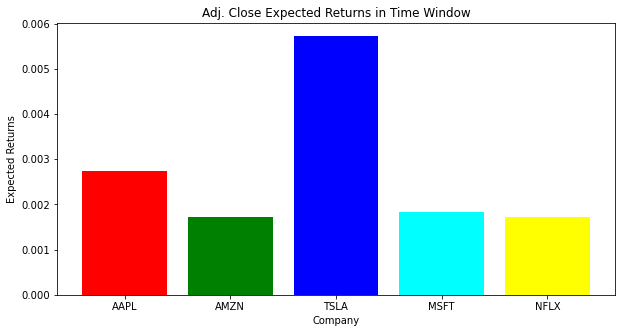

In [134]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['red', 'green', 'blue', 'cyan','yellow']
plt.bar(range(len(daily_mean)),daily_mean,color= colors)
ax.set_xticks(range(len(daily_mean)))
ax.set_xticklabels(daily_mean.keys())
plt.xlabel("Company")
plt.ylabel("Expected Returns")
plt.title("Adj. Close Expected Returns in Time Window")
plt.savefig("CapstoneOpt1_ExpectedReturns.png")
plt.show()

In [119]:
#plt.plot(daily_mean) we can use this also

TSLA has the highest mean simple rate of return over the period of data collected. Thus TSLA would have been a good choice for investment over this period of time (Considering returns). 

# Variance

In [135]:
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
AAPL    0.000567
AMZN    0.000399
TSLA    0.002082
MSFT    0.000460
NFLX    0.000661
dtype: float64

In [121]:
#daily_var.plot(kind = 'bar')

Text(0.5, 1.0, 'Variance of Stocks')

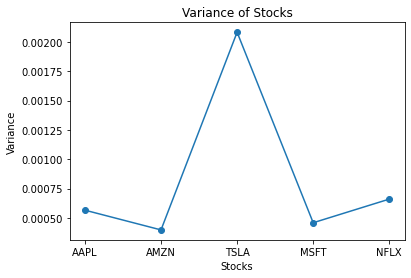

In [136]:
plt.plot(daily_var,marker = 'o')
plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title("Variance of Stocks")


The variance in prices of stocks are an important indicator of how
volatile this investment will be (how returns can fluctuate)
TSLA has the highest variance whereas AMZN seems to have lower variance


# Standard Deviation

In [138]:
daily_std_dev = stock_data_daily_returns.std()
daily_std_dev

Symbols
AAPL    0.023808
AMZN    0.019967
TSLA    0.045627
MSFT    0.021443
NFLX    0.025711
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation'}, xlabel='Symbols'>

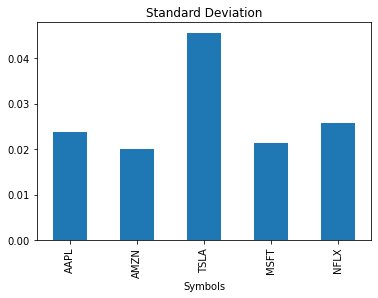

In [139]:
daily_std_dev.plot(kind = 'bar',title = 'Standard Deviation')

Tesla has the higher standard deviation which makes tesla the riskiest stocks comapared to other but also it has given higher returns as compared to others stocks

# Covariance

In [140]:
cov_daily = stock_data_daily_returns.cov()

In [141]:
cov_daily

Symbols,AAPL,AMZN,TSLA,MSFT,NFLX
Symbols,,,,,
AAPL,0.000567,0.000319,0.000475,0.000405,0.000308
AMZN,0.000319,0.000399,0.000378,0.000312,0.000324
TSLA,0.000475,0.000378,0.002082,0.000448,0.000448
MSFT,0.000405,0.000312,0.000448,0.000460,0.000307
NFLX,0.000308,0.000324,0.000448,0.000307,0.000661


# Correlation

In [142]:
corr = stock_data_daily_returns.corr()
corr

Symbols,AAPL,AMZN,TSLA,MSFT,NFLX
Symbols,,,,,
AAPL,1.000000,0.670124,0.437320,0.792703,0.502658
AMZN,0.670124,1.000000,0.415257,0.728650,0.631345
TSLA,0.437320,0.415257,1.000000,0.457938,0.381698
MSFT,0.792703,0.728650,0.457938,1.000000,0.556111
NFLX,0.502658,0.631345,0.381698,0.556111,1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

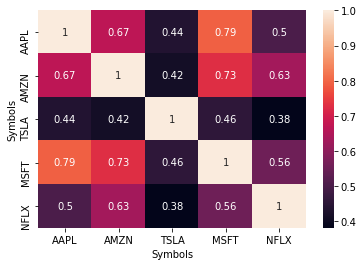

In [143]:
sns.heatmap(corr,annot=True)

None of the stocks are negatively correlated. MSFT and AAPL are highly correlated(0.792703)